# Data

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('Maingames_DS_dataset.csv')
data.head()

Unnamed: 0 Country  Gender                       Game Total Follower  \
0           0      ID    Male                       MLBB          96751   
1           1      ID    Male                8 Ball Pool           4781   
2           2      ID  Female  Free Fire - Battlegrounds          68246   
3           3      ID    Male                       MLBB         142037   
4           4      ID    Male  Free Fire - Battlegrounds          15416   

   Broadcast Hours  PaidStarPerWatchedHour  Character_Facet_Cont_Rigidity  \
0              104                0.004113                       0.663442   
1              174                0.002855                       0.543255   
2               83                0.003007                       0.527279   
3              127                0.005171                       0.677222   
4               86                0.001213                       0.238194   

   Character_Facet_Cont_AchievementStriving  \
0                                  0.718679   
1                                  0.427887   
2                                  0.399873   
3                                  0.603534   
4                                  0.543285   

   Personal_Values_Facet_Cont_Hedonism  ...  \
0                             0.288008  ...   
1                             0.430609  ...   
2                             0.753009  ...   
3                             0.407923  ...   
4                             0.392993  ...   

   Personal_Values_Facet_Cont_UniversalismNature  Role_Charismatic  \
0                                       0.523116          0.408444   
1                                       0.444493          0.407624   
2                                       0.581657          0.443453   
3                                       0.385822          0.408994   
4                                       0.582025          0.135650   

   Personal_Values_Facet_Cont_Tradition  Self_Esteem_Cont_SELevelAppearance  \
0                              0.318747                            0.684412   
1                              0.382594                            0.635493   
2                              0.325263                            0.398686   
3                              0.440821                            0.703669   
4                              0.405968                            0.439668   

   Character_Facet_Cont_Assertiveness  Character_Facet_Cont_Cautiousness  \
0                            0.494384                           0.751974   
1                            0.468738                           0.571198   
2                            0.515929                           0.309322   
3                            0.516412                           0.535322   
4                            0.586193                           0.567604   

   Role_Curator  Personal_Values_Cont_Conservation  \
0      0.524306                           0.299052   
1      0.100202                           0.304527   
2      0.070988                           0.305975   
3      0.214652                           0.298592   
4      0.324364                           0.298716   

   Self_Esteem_Cont_SELevelIntelligence  Temperament_Centric  
0                              0.803920                0.625  
1                              0.751291                0.125  
2                              0.759900                0.000  
3                              0.734010                0.000  
4                              0.814530                0.125  

[5 rows x 127 columns]

# Data Preprocessing

## Cleansing

In [3]:
dt_cleansing = data.copy()
dt_cleansing = dt_cleansing.drop('Unnamed: 0', axis=1)
dt_cleansing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 631 entries, 0 to 630
Columns: 126 entries, Country to Temperament_Centric
dtypes: float64(120), int64(1), object(5)
memory usage: 621.3+ KB


In [4]:
null_columns=dt_cleansing.columns[dt_cleansing.isnull().any()]
dt_cleansing[null_columns].isnull().sum()

Gender                      1
Game                        2
Total Follower              1
PaidStarPerWatchedHour      2
PaidStarPerWatchedHour.1    2
dtype: int64

## Data split based on data type

In [5]:
# int64
df1 = dt_cleansing.select_dtypes(include=['int64'])
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 631 entries, 0 to 630
Data columns (total 1 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Broadcast Hours  631 non-null    int64
dtypes: int64(1)
memory usage: 5.1 KB


In [6]:
# float64
df2 = dt_cleansing.select_dtypes(include=['float64'])
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 631 entries, 0 to 630
Columns: 120 entries, PaidStarPerWatchedHour to Temperament_Centric
dtypes: float64(120)
memory usage: 591.7 KB


In [7]:
null_columns=df2.columns[df2.isnull().any()]
df2[null_columns].isnull().sum()

PaidStarPerWatchedHour      2
PaidStarPerWatchedHour.1    2
dtype: int64

In [8]:
# ubah missing value ke mean
for i in df2:
    df2[i].fillna(df2[i].mean(), inplace=True)

null_columns=df2.columns[df2.isnull().any()]
df2[null_columns].isnull().sum()

C:\Users\salri\anaconda3\lib\site-packages\pandas\core\generic.py:6383: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


Series([], dtype: float64)

In [9]:
# obj
df3 = dt_cleansing.select_dtypes(include=['O'])

null_columns=df3.columns[df3.isnull().any()]
df3[null_columns].isnull().sum()

Gender            1
Game              2
Total Follower    1
dtype: int64

In [10]:
for i in df3:
    df3[i].fillna(df3[i].mode()[0], inplace=True)
    
null_columns=df3.columns[df3.isnull().any()]
df3[null_columns].isnull().sum()

Series([], dtype: float64)

# EDA

In [11]:
df_all = pd.concat([df3,df1,df2], axis=1)
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 631 entries, 0 to 630
Columns: 126 entries, Country to Temperament_Centric
dtypes: float64(120), int64(1), object(5)
memory usage: 621.3+ KB


In [12]:
null_columns=df_all.columns[df_all.isnull().any()]
df_all[null_columns].isnull().sum()

Series([], dtype: float64)

In [13]:
df_eda = df_all.copy()

In [14]:
df_eda.head()

Country  Gender                       Game Total Follower MBTI_grouped  \
0      ID    Male                       MLBB          96751          INT   
1      ID    Male                8 Ball Pool           4781          INT   
2      ID  Female  Free Fire - Battlegrounds          68246          IST   
3      ID    Male                       MLBB         142037          ENT   
4      ID    Male  Free Fire - Battlegrounds          15416          ISF   

   Broadcast Hours  PaidStarPerWatchedHour  Character_Facet_Cont_Rigidity  \
0              104                0.004113                       0.663442   
1              174                0.002855                       0.543255   
2               83                0.003007                       0.527279   
3              127                0.005171                       0.677222   
4               86                0.001213                       0.238194   

   Character_Facet_Cont_AchievementStriving  \
0                                  0.718679   
1                                  0.427887   
2                                  0.399873   
3                                  0.603534   
4                                  0.543285   

   Personal_Values_Facet_Cont_Hedonism  ...  \
0                             0.288008  ...   
1                             0.430609  ...   
2                             0.753009  ...   
3                             0.407923  ...   
4                             0.392993  ...   

   Personal_Values_Facet_Cont_UniversalismNature  Role_Charismatic  \
0                                       0.523116          0.408444   
1                                       0.444493          0.407624   
2                                       0.581657          0.443453   
3                                       0.385822          0.408994   
4                                       0.582025          0.135650   

   Personal_Values_Facet_Cont_Tradition  Self_Esteem_Cont_SELevelAppearance  \
0                              0.318747                            0.684412   
1                              0.382594                            0.635493   
2                              0.325263                            0.398686   
3                              0.440821                            0.703669   
4                              0.405968                            0.439668   

   Character_Facet_Cont_Assertiveness  Character_Facet_Cont_Cautiousness  \
0                            0.494384                           0.751974   
1                            0.468738                           0.571198   
2                            0.515929                           0.309322   
3                            0.516412                           0.535322   
4                            0.586193                           0.567604   

   Role_Curator  Personal_Values_Cont_Conservation  \
0      0.524306                           0.299052   
1      0.100202                           0.304527   
2      0.070988                           0.305975   
3      0.214652                           0.298592   
4      0.324364                           0.298716   

   Self_Esteem_Cont_SELevelIntelligence  Temperament_Centric  
0                              0.803920                0.625  
1                              0.751291                0.125  
2                              0.759900                0.000  
3                              0.734010                0.000  
4                              0.814530                0.125  

[5 rows x 126 columns]

In [15]:
# null_columns=df_eda.columns[df_eda.isnull().any()]
# df_eda[null_columns].isnull().sum()
df_eda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 631 entries, 0 to 630
Columns: 126 entries, Country to Temperament_Centric
dtypes: float64(120), int64(1), object(5)
memory usage: 621.3+ KB


In [16]:
df_eda.head()

Country  Gender                       Game Total Follower MBTI_grouped  \
0      ID    Male                       MLBB          96751          INT   
1      ID    Male                8 Ball Pool           4781          INT   
2      ID  Female  Free Fire - Battlegrounds          68246          IST   
3      ID    Male                       MLBB         142037          ENT   
4      ID    Male  Free Fire - Battlegrounds          15416          ISF   

   Broadcast Hours  PaidStarPerWatchedHour  Character_Facet_Cont_Rigidity  \
0              104                0.004113                       0.663442   
1              174                0.002855                       0.543255   
2               83                0.003007                       0.527279   
3              127                0.005171                       0.677222   
4               86                0.001213                       0.238194   

   Character_Facet_Cont_AchievementStriving  \
0                                  0.718679   
1                                  0.427887   
2                                  0.399873   
3                                  0.603534   
4                                  0.543285   

   Personal_Values_Facet_Cont_Hedonism  ...  \
0                             0.288008  ...   
1                             0.430609  ...   
2                             0.753009  ...   
3                             0.407923  ...   
4                             0.392993  ...   

   Personal_Values_Facet_Cont_UniversalismNature  Role_Charismatic  \
0                                       0.523116          0.408444   
1                                       0.444493          0.407624   
2                                       0.581657          0.443453   
3                                       0.385822          0.408994   
4                                       0.582025          0.135650   

   Personal_Values_Facet_Cont_Tradition  Self_Esteem_Cont_SELevelAppearance  \
0                              0.318747                            0.684412   
1                              0.382594                            0.635493   
2                              0.325263                            0.398686   
3                              0.440821                            0.703669   
4                              0.405968                            0.439668   

   Character_Facet_Cont_Assertiveness  Character_Facet_Cont_Cautiousness  \
0                            0.494384                           0.751974   
1                            0.468738                           0.571198   
2                            0.515929                           0.309322   
3                            0.516412                           0.535322   
4                            0.586193                           0.567604   

   Role_Curator  Personal_Values_Cont_Conservation  \
0      0.524306                           0.299052   
1      0.100202                           0.304527   
2      0.070988                           0.305975   
3      0.214652                           0.298592   
4      0.324364                           0.298716   

   Self_Esteem_Cont_SELevelIntelligence  Temperament_Centric  
0                              0.803920                0.625  
1                              0.751291                0.125  
2                              0.759900                0.000  
3                              0.734010                0.000  
4                              0.814530                0.125  

[5 rows x 126 columns]

## Ubah tipe data untuk dibuat groupby

In [17]:
df_eda['Total Follower'] = pd.to_numeric(df_eda['Total Follower'],errors = 'coerce')

In [18]:
df_eda['Total Follower'].describe()

count    6.270000e+02
mean     2.207951e+05
std      5.543884e+05
min      1.548000e+03
25%      2.601900e+04
50%      7.556500e+04
75%      1.698530e+05
max      7.075717e+06
Name: Total Follower, dtype: float64

In [19]:
coungen = df_eda['Country']+df_eda['Gender']
df_eda['CounGen'] = pd.Series(coungen, index=data.index)

df_eda = df_eda.groupby(by=['CounGen','Game']).sum().reset_index()
df_eda['CounGen'] = df_eda['CounGen'].str.replace(r'\b([A-Z]{1,2})([A-Z][a-z])', r'\1 \2')
df_eda.head()

C:\Users\salri\AppData\Local\Temp/ipykernel_3584/2200465267.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  df_eda['CounGen'] = df_eda['CounGen'].str.replace(r'\b([A-Z]{1,2})([A-Z][a-z])', r'\1 \2')


CounGen                              Game  Total Follower  \
0  ID Female  Counter-Strike: Global Offensive          7074.0   
1  ID Female                  Dead by Daylight         10783.0   
2  ID Female            Euro Truck Simulator 2         13141.0   
3  ID Female         Free Fire - Battlegrounds       1015381.0   
4  ID Female                Grand Theft Auto V         22492.0   

   Broadcast Hours  PaidStarPerWatchedHour  Character_Facet_Cont_Rigidity  \
0              165                0.000370                       0.511582   
1              102                0.004262                       0.561336   
2              131                0.010103                       0.616294   
3             1192                0.043266                       6.223369   
4              343                0.013752                       1.056776   

   Character_Facet_Cont_AchievementStriving  \
0                                  0.416706   
1                                  0.378814   
2                                  0.592737   
3                                  4.346161   
4                                  0.583915   

   Personal_Values_Facet_Cont_Hedonism  Character_Facet_Cont_Dutifulness  \
0                             0.570254                          0.491664   
1                             0.547942                          0.567108   
2                             0.265182                          0.508094   
3                             6.575982                          5.451041   
4                             1.239358                          1.097674   

   Character_Cont_Conscientiousness  ...  \
0                          0.419894  ...   
1                          0.496743  ...   
2                          0.501851  ...   
3                          4.845406  ...   
4                          0.740099  ...   

   Personal_Values_Facet_Cont_UniversalismNature  Role_Charismatic  \
0                                       0.494942          0.424925   
1                                       0.594737          0.397342   
2                                       0.444458          0.678618   
3                                       5.974718          4.732493   
4                                       1.127444          0.766074   

   Personal_Values_Facet_Cont_Tradition  Self_Esteem_Cont_SELevelAppearance  \
0                              0.296139                            0.658955   
1                              0.341652                            0.458656   
2                              0.333769                            0.745080   
3                              3.695310                            5.588895   
4                              0.709807                            0.910835   

   Character_Facet_Cont_Assertiveness  Character_Facet_Cont_Cautiousness  \
0                            0.472034                           0.293162   
1                            0.412747                           0.387027   
2                            0.505552                           0.540677   
3                            5.800274                           4.060896   
4                            0.811808                           0.705788   

   Role_Curator  Personal_Values_Cont_Conservation  \
0      0.206182                           0.292675   
1      0.418017                           0.291648   
2      0.232487                           0.301729   
3      3.403789                           3.209445   
4      0.152925                           0.573141   

   Self_Esteem_Cont_SELevelIntelligence  Temperament_Centric  
0                              0.703834                0.125  
1                              0.742862                0.250  
2                              0.824192                0.500  
3                              8.164854                3.375  
4                              1.404397                0.250  

[5 rows x 124 columns]

In [20]:
df_eda['CounGen'].value_counts()

VN Male      31
ID Male      29
PH Male      19
PH Female    14
VN Female    14
ID Female    10
VN-           1
Name: CounGen, dtype: int64

In [21]:
df_eda = df_eda.replace({'CounGen': {'VN-': 'VN Male'}}, regex=True)

In [22]:
df_bar = df_eda[['CounGen','Game','Total Follower']]
x = df_bar['CounGen'].value_counts()
x
# df_bar = df_bar.sort_values('CounGen')

VN Male      32
ID Male      29
PH Male      19
PH Female    14
VN Female    14
ID Female    10
Name: CounGen, dtype: int64

In [23]:
# df_bar['CounGen'].unique()
CounGen_Pie = df_bar['CounGen'].value_counts().rename_axis('CounGen').reset_index(name='Total Game')
CounGen_Pie.to_csv('CounGen_Pie.csv')
CounGen_Pie

CounGen  Total Game
0    VN Male          32
1    ID Male          29
2    PH Male          19
3  PH Female          14
4  VN Female          14
5  ID Female          10

In [24]:
CounGen_Pie['Total Game'].sum()

118

# Feature Engineering

In [25]:
import plotly.express as px
import plotly.graph_objects as go
import os
from plotly.subplots import make_subplots

In [26]:
df_ml = df_eda.copy()
df_ml.to_csv('df_ml.csv', index=False)
df_ml.head()

CounGen                              Game  Total Follower  \
0  ID Female  Counter-Strike: Global Offensive          7074.0   
1  ID Female                  Dead by Daylight         10783.0   
2  ID Female            Euro Truck Simulator 2         13141.0   
3  ID Female         Free Fire - Battlegrounds       1015381.0   
4  ID Female                Grand Theft Auto V         22492.0   

   Broadcast Hours  PaidStarPerWatchedHour  Character_Facet_Cont_Rigidity  \
0              165                0.000370                       0.511582   
1              102                0.004262                       0.561336   
2              131                0.010103                       0.616294   
3             1192                0.043266                       6.223369   
4              343                0.013752                       1.056776   

   Character_Facet_Cont_AchievementStriving  \
0                                  0.416706   
1                                  0.378814   
2                                  0.592737   
3                                  4.346161   
4                                  0.583915   

   Personal_Values_Facet_Cont_Hedonism  Character_Facet_Cont_Dutifulness  \
0                             0.570254                          0.491664   
1                             0.547942                          0.567108   
2                             0.265182                          0.508094   
3                             6.575982                          5.451041   
4                             1.239358                          1.097674   

   Character_Cont_Conscientiousness  ...  \
0                          0.419894  ...   
1                          0.496743  ...   
2                          0.501851  ...   
3                          4.845406  ...   
4                          0.740099  ...   

   Personal_Values_Facet_Cont_UniversalismNature  Role_Charismatic  \
0                                       0.494942          0.424925   
1                                       0.594737          0.397342   
2                                       0.444458          0.678618   
3                                       5.974718          4.732493   
4                                       1.127444          0.766074   

   Personal_Values_Facet_Cont_Tradition  Self_Esteem_Cont_SELevelAppearance  \
0                              0.296139                            0.658955   
1                              0.341652                            0.458656   
2                              0.333769                            0.745080   
3                              3.695310                            5.588895   
4                              0.709807                            0.910835   

   Character_Facet_Cont_Assertiveness  Character_Facet_Cont_Cautiousness  \
0                            0.472034                           0.293162   
1                            0.412747                           0.387027   
2                            0.505552                           0.540677   
3                            5.800274                           4.060896   
4                            0.811808                           0.705788   

   Role_Curator  Personal_Values_Cont_Conservation  \
0      0.206182                           0.292675   
1      0.418017                           0.291648   
2      0.232487                           0.301729   
3      3.403789                           3.209445   
4      0.152925                           0.573141   

   Self_Esteem_Cont_SELevelIntelligence  Temperament_Centric  
0                              0.703834                0.125  
1                              0.742862                0.250  
2                              0.824192                0.500  
3                              8.164854                3.375  
4                              1.404397                0.250  

[5 rows x 124 columns]

In [27]:
# Regression model
tes_corr = df_ml.corr()
tes_corr

Total Follower  Broadcast Hours  \
Total Follower                                  1.000000         0.675280   
Broadcast Hours                                 0.675280         1.000000   
PaidStarPerWatchedHour                          0.226111         0.211732   
Character_Facet_Cont_Rigidity                   0.655316         0.993176   
Character_Facet_Cont_AchievementStriving        0.618991         0.985516   
...                                                  ...              ...   
Character_Facet_Cont_Cautiousness               0.626342         0.984601   
Role_Curator                                    0.636978         0.977457   
Personal_Values_Cont_Conservation               0.661495         0.992394   
Self_Esteem_Cont_SELevelIntelligence            0.655206         0.992370   
Temperament_Centric                             0.699274         0.981551   

                                          PaidStarPerWatchedHour  \
Total Follower                                          0.226111   
Broadcast Hours                                         0.211732   
PaidStarPerWatchedHour                                  1.000000   
Character_Facet_Cont_Rigidity                           0.213447   
Character_Facet_Cont_AchievementStriving                0.188238   
...                                                          ...   
Character_Facet_Cont_Cautiousness                       0.185778   
Role_Curator                                            0.236768   
Personal_Values_Cont_Conservation                       0.222816   
Self_Esteem_Cont_SELevelIntelligence                    0.217484   
Temperament_Centric                                     0.224759   

                                          Character_Facet_Cont_Rigidity  \
Total Follower                                                 0.655316   
Broadcast Hours                                                0.993176   
PaidStarPerWatchedHour                                         0.213447   
Character_Facet_Cont_Rigidity                                  1.000000   
Character_Facet_Cont_AchievementStriving                       0.994843   
...                                                                 ...   
Character_Facet_Cont_Cautiousness                              0.993726   
Role_Curator                                                   0.985930   
Personal_Values_Cont_Conservation                              0.998720   
Self_Esteem_Cont_SELevelIntelligence                           0.998895   
Temperament_Centric                                            0.987076   

                                          Character_Facet_Cont_AchievementStriving  \
Total Follower                                                            0.618991   
Broadcast Hours                                                           0.985516   
PaidStarPerWatchedHour                                                    0.188238   
Character_Facet_Cont_Rigidity                                             0.994843   
Character_Facet_Cont_AchievementStriving                                  1.000000   
...                                                                            ...   
Character_Facet_Cont_Cautiousness                                         0.998510   
Role_Curator                                                              0.975871   
Personal_Values_Cont_Conservation                                         0.991466   
Self_Esteem_Cont_SELevelIntelligence                                      0.994007   
Temperament_Centric                                                       0.978580   

                                          Personal_Values_Facet_Cont_Hedonism  \
Total Follower                                                       0.685681   
Broadcast Hours                                                      0.983599   
PaidStarPerWatchedHour                                               0.251380   
Character_Facet_Cont_Rigidity             

In [28]:
# f_awal = tes_corr[abs(tes_corr['Total Follower'])>0.7].index
# f_awal = tes_corr[abs(tes_corr['Total Follower'])>0.6].index

df = tes_corr

def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, n=5):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

print("Top Absolute Correlations")
print(get_top_abs_correlations(df, 5))


# f_awal = pd.DataFrame(f_awal)
# f_awal.head(7)

Top Absolute Correlations
PaidStarPerWatchedHour                       PaidStarPerWatchedHour.1                   1.000000
Personal_Values_Cont_OpennessToChange        Personal_Values_Cont_Conservation          0.999995
Self_Esteem_Cont_SEAspirationOriginality     Self_Esteem_Cont_SEAspirationConfidence    0.999995
Personal_Values_Facet_Cont_SecuritySocietal  Personal_Values_Facet_Cont_Humility        0.999990
Personal_Values_Facet_Cont_PowerResources    Character_Facet_Cont_Cautiousness          0.999989
dtype: float64


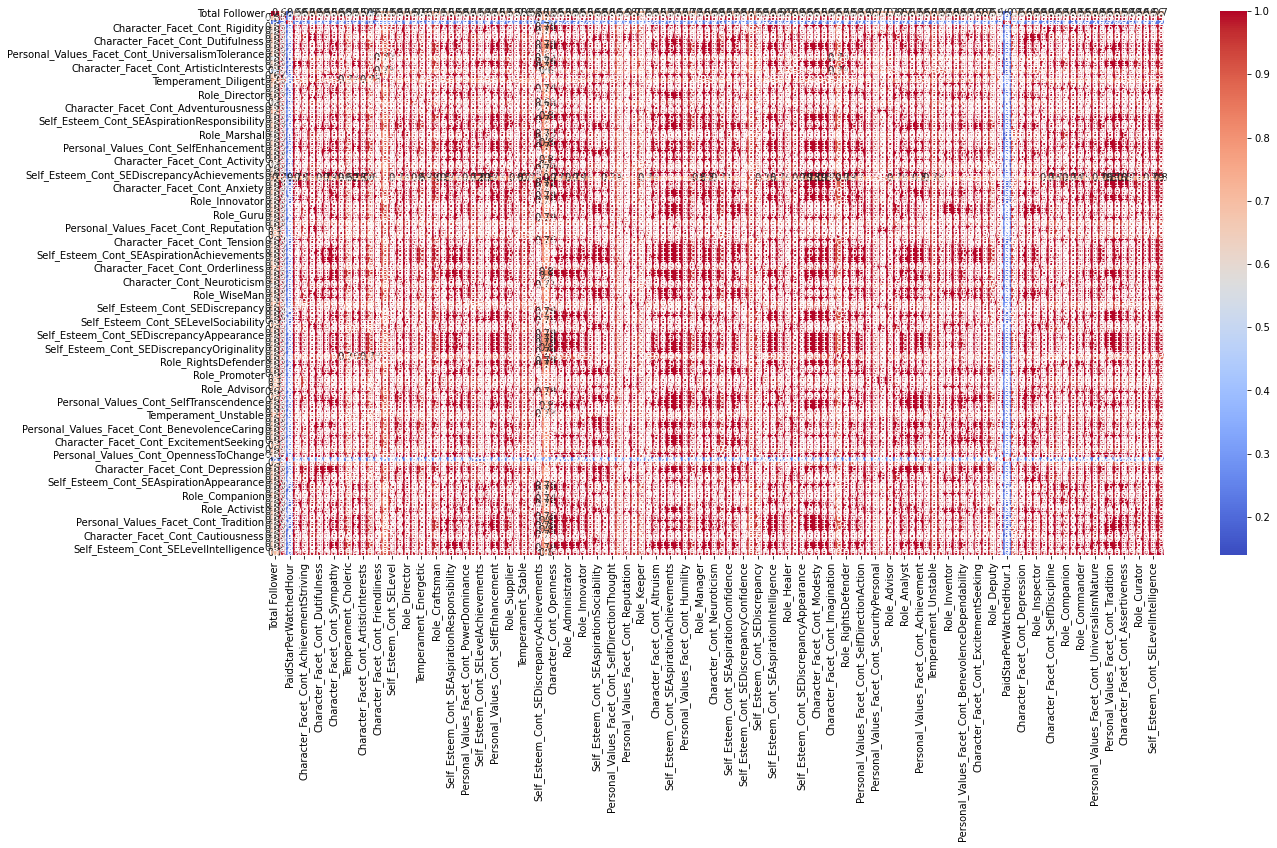

In [29]:
# >7 & <7
# features_select = df_ml[['Total Follower','Personal_Values_Cont_OpennessToChange',
#                          'Personal_Values_Cont_Conservation','Self_Esteem_Cont_SEAspirationOriginality',
#                         'Self_Esteem_Cont_SEAspirationConfidence','Personal_Values_Facet_Cont_SecuritySocietal','Personal_Values_Facet_Cont_Humility']]
features_select = df_ml.drop(['CounGen','Game'],axis=1)
# features_select.shape
# # df_features
corr = features_select.corr()
# corr
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (20,10))
sns.heatmap(corr, cmap = 'coolwarm', annot = True)
plt.show()

In [31]:
# a
import numpy as np

dataset = features_select.copy()
dataset = dataset.drop([1], axis=0)
# print(dataset.head())
data_input = features_select[:1]
data_input = data_input[['Total Follower', 'Broadcast Hours']]
print("Inputan :\n",data_input)
# print(dataset.head())

x = np.array(dataset['Broadcast Hours']).reshape(-1, 1)
# print(x)
y = np.array(dataset['Total Follower']).reshape(-1, 1)

# importing train_test_split from sklearn
from sklearn.model_selection import train_test_split
# splitting the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 20)

# importing module
from sklearn.linear_model import LinearRegression
# creating an object of LinearRegression class
LR = LinearRegression().fit(x_train,y_train)
# fitting the training data
# LR

y_prediction =  LR.predict(x_test)
# y_prediction

# importing r2_score module
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
# predicting the accuracy score
score=r2_score(y_test,y_prediction)
print('Akurasi ',score)


df_us = data_input.copy()
df_us = data_input

x_df_us = np.array(df_us['Broadcast Hours']).reshape(-1, 1)
y_df_us = np.array(df_us['Total Follower']).reshape(-1, 1)

y_prediction =  LR.predict(x_df_us)


# y_df_us
print("Prediksi",x_df_us,"=",y_prediction)

Inputan :
    Total Follower  Broadcast Hours
0          7074.0              165
Akurasi  0.7483446708485355
Prediksi [[165]] = [[286436.28831225]]


In [32]:
# a
dataset = features_select.copy()
dataset = dataset.drop([1], axis=0)
# print(dataset.head())
data_input = features_select[:1]
# data_input = data_input[['Total Follower', 'Broadcast Hours']]
# print("Inputan :\n",data_input)
# print(dataset.head())

# x = np.array(dataset['Broadcast Hours']).reshape(-1, 1)
# # print(x)
# y = np.array(dataset['Total Follower']).reshape(-1, 1)
x = dataset.drop(['Total Follower'], axis=1)
y = dataset['Total Follower']
# x
# importing train_test_split from sklearn
from sklearn.model_selection import train_test_split
# splitting the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 20)

# importing module
from sklearn.linear_model import LinearRegression
# creating an object of LinearRegression class
LR = LinearRegression().fit(x_train,y_train)
# fitting the training data
# LR

y_prediction =  LR.predict(x_test)
# y_prediction

# # # importing r2_score module
# from sklearn.metrics import r2_score
# from sklearn.metrics import mean_squared_error
# # predicting the accuracy score
# score=r2_score(y_test,y_prediction)
# print('Akurasi ',score)


df_us = data_input.copy()
df_us = data_input
# df_us
# x_df_us = np.array(df_us['Broadcast Hours']).reshape(-1, 1)
x_df_us = df_us.drop(['Total Follower'], axis=1)
y_df_us = np.array(df_us['Total Follower']).reshape(-1, 1)

y_prediction =  LR.predict(x_df_us)


# y_df_us
print("Prediksi =",y_prediction)

Prediksi = [7074.00000028]


In [33]:
# dataset = dataset.drop([0], axis=0)
# features_select = features_select.
dataset.head()

Total Follower  Broadcast Hours  PaidStarPerWatchedHour  \
0          7074.0              165                0.000370   
2         13141.0              131                0.010103   
3       1015381.0             1192                0.043266   
4         22492.0              343                0.013752   
5        899591.0             2106                0.100163   

   Character_Facet_Cont_Rigidity  Character_Facet_Cont_AchievementStriving  \
0                       0.511582                                  0.416706   
2                       0.616294                                  0.592737   
3                       6.223369                                  4.346161   
4                       1.056776                                  0.583915   
5                       9.226213                                  6.637935   

   Personal_Values_Facet_Cont_Hedonism  Character_Facet_Cont_Dutifulness  \
0                             0.570254                          0.491664   
2                             0.265182                          0.508094   
3                             6.575982                          5.451041   
4                             1.239358                          1.097674   
5                            10.797513                          9.478933   

   Character_Cont_Conscientiousness  Character_Facet_Cont_Sympathy  \
0                          0.419894                       0.272225   
2                          0.501851                       0.418261   
3                          4.845406                       3.819305   
4                          0.740099                       0.763644   
5                          7.621902                       5.502423   

   Personal_Values_Facet_Cont_UniversalismTolerance  ...  \
0                                          0.614847  ...   
2                                          0.514361  ...   
3                                          6.675800  ...   
4                                          1.215541  ...   
5                                         10.965964  ...   

   Personal_Values_Facet_Cont_UniversalismNature  Role_Charismatic  \
0                                       0.494942          0.424925   
2                                       0.444458          0.678618   
3                                       5.974718          4.732493   
4                                       1.127444          0.766074   
5                                       9.664292          8.130679   

   Personal_Values_Facet_Cont_Tradition  Self_Esteem_Cont_SELevelAppearance  \
0                              0.296139                            0.658955   
2                              0.333769                            0.745080   
3                              3.695310                            5.588895   
4                              0.709807                            0.910835   
5                              5.835424                            9.589403   

   Character_Facet_Cont_Assertiveness  Character_Facet_Cont_Cautiousness  \
0                            0.472034                           0.293162   
2                            0.505552                           0.540677   
3                            5.800274                           4.060896   
4                            0.811808                           0.705788   
5                            8.044332                           6.840041   

   Role_Curator  Personal_Values_Cont_Conservation  \
0      0.206182                           0.292675   
2      0.232487                           0.301729   
3      3.403789                           3.209445   
4      0.152925                           0.573141   
5      4.924810                           5.298196   

   Self_Esteem_Cont_SELevelIntelligence  Temperament_Centric  
0                              0.703834                0.125  
2                              0.824192                0.500  
3                              8.164854                

In [34]:
#separate the other attributes from the predicting attribute
# x = dataset.drop(['Total Follower'],axis=1)
# np.array(df_us['Broadcast Hours']).reshape(-1, 1)

# x = dataset['Broadcast Hours']
#separte the predicting attribute into Y for model training
# y = dataset['Total Follower']

In [36]:
# data_input

In [39]:
# importing r2_score module
# from sklearn.metrics import r2_score
# from sklearn.metrics import mean_squared_error
# predicting the accuracy score
# score=r2_score(y_test,y_prediction)
# print('Akurasi ',score)
# Predicting the Test set results
# y_pred = y_prediction.predict(X_test)
# print('Coefficients: \n', y_prediction.coef_)

In [40]:
# Prediksi follower data 1
a = features_select.copy()
# a = a[:1]
a

Total Follower  Broadcast Hours  PaidStarPerWatchedHour  \
0            7074.0              165                0.000370   
1           10783.0              102                0.004262   
2           13141.0              131                0.010103   
3         1015381.0             1192                0.043266   
4           22492.0              343                0.013752   
..              ...              ...                     ...   
113        391925.0              291                0.004742   
114        196718.0              145                0.005211   
115        378864.0               87                0.005631   
116        755450.0              747                0.003968   
117        109082.0              280                0.003452   

     Character_Facet_Cont_Rigidity  Character_Facet_Cont_AchievementStriving  \
0                         0.511582                                  0.416706   
1                         0.561336                                  0.378814   
2                         0.616294                                  0.592737   
3                         6.223369                                  4.346161   
4                         1.056776                                  0.583915   
..                             ...                                       ...   
113                       1.848761                                  1.501026   
114                       0.561336                                  0.378814   
115                       0.783880                                  0.658806   
116                       3.149662                                  2.939963   
117                       1.254791                                  1.177876   

     Personal_Values_Facet_Cont_Hedonism  Character_Facet_Cont_Dutifulness  \
0                               0.570254                          0.491664   
1                               0.547942                          0.567108   
2                               0.265182                          0.508094   
3                               6.575982                          5.451041   
4                               1.239358                          1.097674   
..                                   ...                               ...   
113                             1.339406                          1.379350   
114                             0.547942                          0.567108   
115                             0.555652                          0.408664   
116                             2.125079                          2.653564   
117                             0.793333                          1.047465   

     Character_Cont_Conscientiousness  Character_Facet_Cont_Sympathy  \
0                            0.419894                       0.272225   
1                            0.496743                       0.389375   
2                            0.501851                       0.418261   
3                            4.845406                       3.819305   
4                            0.740099                       0.763644   
..                                ...                            ...   
113                          1.632247                       1.527331   
114                          0.496743                       0.389375   
115                          0.598855                       0.559391   
116                          2.517393                       2.117457   
117                          1.009301                       0.778558   

     Personal_Values_Facet_Cont_UniversalismTolerance  ...  \
0                                            0.614847  ...   
1                                            0.552733  ...   
2                                            0.514361  ...   
3                                            6.675800  ...   
4                                            1.215541  ...   
..                                                ...  ...   
113                                    

In [41]:
# Prediksi US

# df_us['region'] =  df_us['region'].replace(['Europe','Africa','South/Latin America','Asia & Pacific','Middle east','Arab States','North America'],
#                                             [0,1,2,3,4,5,6])
# df_us['climate'] = df_us['climate'].replace(['nontropic','tropic'],
#                                                        [0,1])

# df_us = df_us[df_us['country'].isin(['US'])]
# df_us.head()

#separate the other attributes from the predicting attribute
x_df_a = a.drop(['Total Follower'],axis=1)
#separte the predicting attribute into Y for model training 
# y_df_a = a['Total Follower']
# y_df_us

y_prediction =  LR.predict(x_df_a)
y_prediction

array([ 7.07400000e+03, -4.47300209e+04,  6.50844918e+07, -4.20808279e+07,
        2.24920000e+04,  8.99591000e+05,  3.47029234e+08,  2.34680000e+04,
        6.65871259e+05,  1.01807000e+05,  8.25800000e+03,  3.14800000e+03,
        4.46410000e+04,  8.36600000e+03,  7.53590000e+04,  1.95432000e+05,
        2.45145000e+05,  1.23624000e+05,  7.35900000e+03,  1.43654000e+05,
        2.16757000e+06,  7.63490000e+04,  1.24211000e+05,  2.25307800e+06,
        9.28830000e+04,  1.23020000e+04,  1.46840000e+04,  1.78920000e+04,
        1.79035500e+06,  8.15900000e+03,  2.67680000e+04,  3.44740000e+04,
        2.60110000e+04,  2.51750000e+04,  5.41700000e+03,  2.55230000e+04,
       -9.79025575e+07,  1.45880000e+04, -2.77594038e+07,  1.07787000e+05,
       -1.67208706e+08,  8.37449489e+06, -4.00813750e+05,  6.47026000e+05,
        2.38942700e+06,  6.73072000e+05,  1.34673000e+05,  2.08033330e+07,
       -7.26659770e+07,  3.24554227e+06, -2.10615874e+05,  4.58940000e+05,
        7.73756684e+07,  

In [42]:
# data = data.drop(labels=0, axis=0)
data_lr = a.drop(labels=0, axis=0)
data_lr = data_lr[['Total Follower', 'Broadcast Hours']]
data_lr

Total Follower  Broadcast Hours
1           10783.0              102
2           13141.0              131
3         1015381.0             1192
4           22492.0              343
5          899591.0             2106
..              ...              ...
113        391925.0              291
114        196718.0              145
115        378864.0               87
116        755450.0              747
117        109082.0              280

[117 rows x 2 columns]

In [44]:
# X = np.array(df_binary['Sal']).reshape(-1, 1)
X = np.array(data_lr['Broadcast Hours']).reshape(-1, 1)
y = np.array(data_lr['Total Follower']).reshape(-1, 1)

# Separating the data into independent and dependent variables
# Converting each dataframe into a numpy array
# since each dataframe contains only one column
data_lr.dropna(inplace = True)

# Dropping any rows with Nan values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

# Splitting the data into training and testing data
regr = LinearRegression()

regr.fit(X_train, y_train)
print(regr.score(X_test, y_test))


-0.042818516089155434


In [45]:
# df_ml['TotBroad'] = (df_ml['Total Follower']/df_ml['Broadcast Hour'])
# df_ml
# df_selection = df_ml.copy()
# df_selection = df_selection[['Cougen','Game','Total Follower','Broadcast Hours','TotBroad']]
# df_selection.head()

TotBroad = df_ml['Total Follower']/df_ml['Broadcast Hours']
df_ml['TotBroad'] = pd.Series(TotBroad, index=data.index)
df_ml.head()

CounGen                              Game  Total Follower  \
0  ID Female  Counter-Strike: Global Offensive          7074.0   
1  ID Female                  Dead by Daylight         10783.0   
2  ID Female            Euro Truck Simulator 2         13141.0   
3  ID Female         Free Fire - Battlegrounds       1015381.0   
4  ID Female                Grand Theft Auto V         22492.0   

   Broadcast Hours  PaidStarPerWatchedHour  Character_Facet_Cont_Rigidity  \
0              165                0.000370                       0.511582   
1              102                0.004262                       0.561336   
2              131                0.010103                       0.616294   
3             1192                0.043266                       6.223369   
4              343                0.013752                       1.056776   

   Character_Facet_Cont_AchievementStriving  \
0                                  0.416706   
1                                  0.378814   
2                                  0.592737   
3                                  4.346161   
4                                  0.583915   

   Personal_Values_Facet_Cont_Hedonism  Character_Facet_Cont_Dutifulness  \
0                             0.570254                          0.491664   
1                             0.547942                          0.567108   
2                             0.265182                          0.508094   
3                             6.575982                          5.451041   
4                             1.239358                          1.097674   

   Character_Cont_Conscientiousness  ...  Role_Charismatic  \
0                          0.419894  ...          0.424925   
1                          0.496743  ...          0.397342   
2                          0.501851  ...          0.678618   
3                          4.845406  ...          4.732493   
4                          0.740099  ...          0.766074   

   Personal_Values_Facet_Cont_Tradition  Self_Esteem_Cont_SELevelAppearance  \
0                              0.296139                            0.658955   
1                              0.341652                            0.458656   
2                              0.333769                            0.745080   
3                              3.695310                            5.588895   
4                              0.709807                            0.910835   

   Character_Facet_Cont_Assertiveness  Character_Facet_Cont_Cautiousness  \
0                            0.472034                           0.293162   
1                            0.412747                           0.387027   
2                            0.505552                           0.540677   
3                            5.800274                           4.060896   
4                            0.811808                           0.705788   

   Role_Curator  Personal_Values_Cont_Conservation  \
0      0.206182                           0.292675   
1      0.418017                           0.291648   
2      0.232487                           0.301729   
3      3.403789                           3.209445   
4      0.152925                           0.573141   

   Self_Esteem_Cont_SELevelIntelligence  Temperament_Centric    TotBroad  
0                              0.703834                0.125   42.872727  
1                              0.742862                0.250  105.715686  
2                              0.824192                0.500  100.312977  
3                              8.164854                3.375  851.829698  
4                              1.404397                0.250   65.574344  

[5 rows x 125 columns]

In [46]:
df_selection = df_ml.copy()
df_selection = df_selection[['CounGen','Game','Total Follower','Broadcast Hours','TotBroad']]
df_selection.head()
# df_eda = df_eda.groupby(by=['CounGen','Game']).sum().reset_index()
# df_eda['CounGen'] = df_eda['CounGen'].str.replace(r'\b([A-Z]{1,2})([A-Z][a-z])', r'\1 \2')
# df_eda.head()

CounGen                              Game  Total Follower  \
0  ID Female  Counter-Strike: Global Offensive          7074.0   
1  ID Female                  Dead by Daylight         10783.0   
2  ID Female            Euro Truck Simulator 2         13141.0   
3  ID Female         Free Fire - Battlegrounds       1015381.0   
4  ID Female                Grand Theft Auto V         22492.0   

   Broadcast Hours    TotBroad  
0              165   42.872727  
1              102  105.715686  
2              131  100.312977  
3             1192  851.829698  
4              343   65.574344

In [47]:
top_10_df_last = df_selection.nlargest(10,['Broadcast Hours','Total Follower'])
top_10_df_last

CounGen                       Game  Total Follower  Broadcast Hours  \
28     ID Male                       PUBG       1790355.0             7189   
62     PH Male                       MLBB      24193361.0             6677   
23     ID Male                       MLBB       2253078.0             5534   
90     VN Male             Arena of Valor       8877353.0             5068   
47   PH Female                       MLBB      20803333.0             4571   
111    VN Male                       PUBG       6513863.0             4129   
20     ID Male  Free Fire - Battlegrounds       2167570.0             2835   
88     VN Male             Age of Empires       3180171.0             2595   
106    VN Male          League of Legends       9435470.0             2384   
5    ID Female                       MLBB        899591.0             2106   

        TotBroad  
28    249.040896  
62   3623.387899  
23    407.133719  
90   1751.648185  
47   4551.155765  
111  1577.588520  
20    764.574956  
88   1225.499422  
106  3957.831376  
5     427.156220

In [48]:
# Korelasi data

import numpy as np
import scipy.stats
from scipy import stats

a = top_10_df_last['Total Follower']
b = top_10_df_last['Broadcast Hours']
c = top_10_df_last['TotBroad']
a_b = stats.ttest_ind(a,b)
print("Total Follower & Broadcast Hours : \n",a_b)
a_c = stats.ttest_ind(a,c)
print("TOtal Follower & TotBroad : \n",a_c)
b_c = stats.ttest_ind(b,c)
print("Broadcast Hours & TotBroad : \n",b_c)
# print("""
# Kesimpulan :
# Tidak ada korelasi karena p-value untuk ketiga variabel yang dihubungkan memiliki nilai > 0.05""")

Total Follower & Broadcast Hours : 
 Ttest_indResult(statistic=3.0745095529585353, pvalue=0.006533396465344967)
TOtal Follower & TotBroad : 
 Ttest_indResult(statistic=3.075452336825555, pvalue=0.006519955445319043)
Broadcast Hours & TotBroad : 
 Ttest_indResult(statistic=3.200920478468549, pvalue=0.0049524584270078005)


## Correlation

In [315]:
# Buat uji hopotesa
# prediksi (linear regression)

In [314]:
# buat 1 column dari data Total Follower : Broadcast Hour
# 7074/165

In [371]:
# import matplotlib.pyplot as plt
# import seaborn as sns

# corr_select = features_select.corr()
# # corr_select

# plt.figure(figsize = (20,10))
# sns.heatmap(corr_select, cmap = 'coolwarm', annot = True)
# plt.show()

In [372]:
# corr_select = corr_select[abs(corr_select['Total Follower'])>0.7].index
# corr_select = pd.DataFrame(corr_select)
# corr_select

In [373]:
# features_select = df_ml[['Total Follower','Temperament_Diligent','Role_Craftsman','Temperament_Melancholic','Role_Guardian',
#                          'Role_Keeper','Character_Facet_Cont_Orderliness','Role_Assistant','Temperament_Unstable',
#                          'Role_Designer']]
# features_select.info()

## Clustering

In [49]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

df_clust = df_selection.copy()
df_clust.head()

CounGen                              Game  Total Follower  \
0  ID Female  Counter-Strike: Global Offensive          7074.0   
1  ID Female                  Dead by Daylight         10783.0   
2  ID Female            Euro Truck Simulator 2         13141.0   
3  ID Female         Free Fire - Battlegrounds       1015381.0   
4  ID Female                Grand Theft Auto V         22492.0   

   Broadcast Hours    TotBroad  
0              165   42.872727  
1              102  105.715686  
2              131  100.312977  
3             1192  851.829698  
4              343   65.574344

In [50]:
df_clust = df_clust[['Total Follower','Broadcast Hours','TotBroad']]
cls = KMeans(n_clusters=3, random_state=3)
cls.fit(df_clust)

KMeans(n_clusters=3, random_state=3)

In [51]:
cls.predict(df_clust)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1])

In [52]:
df2 = cls.predict(df_clust)
df1 = features_select.copy()
# df1 = df_clust.copy()
# df1
df1['Cluster'] = pd.Series(df2, index=df1.index)
df1.head()

Total Follower  Broadcast Hours  PaidStarPerWatchedHour  \
0          7074.0              165                0.000370   
1         10783.0              102                0.004262   
2         13141.0              131                0.010103   
3       1015381.0             1192                0.043266   
4         22492.0              343                0.013752   

   Character_Facet_Cont_Rigidity  Character_Facet_Cont_AchievementStriving  \
0                       0.511582                                  0.416706   
1                       0.561336                                  0.378814   
2                       0.616294                                  0.592737   
3                       6.223369                                  4.346161   
4                       1.056776                                  0.583915   

   Personal_Values_Facet_Cont_Hedonism  Character_Facet_Cont_Dutifulness  \
0                             0.570254                          0.491664   
1                             0.547942                          0.567108   
2                             0.265182                          0.508094   
3                             6.575982                          5.451041   
4                             1.239358                          1.097674   

   Character_Cont_Conscientiousness  Character_Facet_Cont_Sympathy  \
0                          0.419894                       0.272225   
1                          0.496743                       0.389375   
2                          0.501851                       0.418261   
3                          4.845406                       3.819305   
4                          0.740099                       0.763644   

   Personal_Values_Facet_Cont_UniversalismTolerance  ...  Role_Charismatic  \
0                                          0.614847  ...          0.424925   
1                                          0.552733  ...          0.397342   
2                                          0.514361  ...          0.678618   
3                                          6.675800  ...          4.732493   
4                                          1.215541  ...          0.766074   

   Personal_Values_Facet_Cont_Tradition  Self_Esteem_Cont_SELevelAppearance  \
0                              0.296139                            0.658955   
1                              0.341652                            0.458656   
2                              0.333769                            0.745080   
3                              3.695310                            5.588895   
4                              0.709807                            0.910835   

   Character_Facet_Cont_Assertiveness  Character_Facet_Cont_Cautiousness  \
0                            0.472034                           0.293162   
1                            0.412747                           0.387027   
2                            0.505552                           0.540677   
3                            5.800274                           4.060896   
4                            0.811808                           0.705788   

   Role_Curator  Personal_Values_Cont_Conservation  \
0      0.206182                           0.292675   
1      0.418017                           0.291648   
2      0.232487                           0.301729   
3      3.403789                           3.209445   
4      0.152925                           0.573141   

   Self_Esteem_Cont_SELevelIntelligence  Temperament_Centric  Cluster  
0                              0.703834                0.125        1  
1                              0.742862                0.250        1  
2                              0.824192                0.500        1  
3                              8.164854                3.375        1  
4                              1.404397                0.250        1  

[5 rows x 123 columns]

In [53]:
clust_0 = df1[df1['Cluster'] ==0]
clust_0.head()

Total Follower  Broadcast Hours  PaidStarPerWatchedHour  \
41       10389817.0              243                0.029597   
80        7137810.0              753                0.014460   
90        8877353.0             5068                0.055251   
106       9435470.0             2384                0.092959   
111       6513863.0             4129                0.083796   

     Character_Facet_Cont_Rigidity  Character_Facet_Cont_AchievementStriving  \
41                        1.122672                                  0.757627   
80                        3.717914                                  2.858192   
90                       22.728474                                 18.547526   
106                      11.580344                                 10.111420   
111                      18.696213                                 15.890408   

     Personal_Values_Facet_Cont_Hedonism  Character_Facet_Cont_Dutifulness  \
41                              1.095883                          1.134216   
80                              3.709179                          4.018567   
90                             18.629876                         18.488689   
106                             9.206354                          9.037266   
111                            15.129114                         14.076803   

     Character_Cont_Conscientiousness  Character_Facet_Cont_Sympathy  \
41                           0.993486                       0.778750   
80                           3.197414                       2.475664   
90                          17.611460                      15.017306   
106                          8.744317                       7.538457   
111                         13.828587                      11.567032   

     Personal_Values_Facet_Cont_UniversalismTolerance  ...  Role_Charismatic  \
41                                           1.105466  ...          0.794684   
80                                           4.061750  ...          2.520330   
90                                          19.951276  ...         18.006035   
106                                         10.132557  ...          9.990548   
111                                         15.593279  ...         15.206532   

     Personal_Values_Facet_Cont_Tradition  Self_Esteem_Cont_SELevelAppearance  \
41                               0.683304                            0.917311   
80                               2.385199                            3.487914   
90                              12.680319                           22.584992   
106                              6.410597                           11.898843   
111                             10.171042                           19.260704   

     Character_Facet_Cont_Assertiveness  Character_Facet_Cont_Cautiousness  \
41                             0.825493                           0.774054   
80                             3.102054                           2.882925   
90                            17.554901                          18.709095   
106                            9.330945                           9.638266   
111                           14.881589                          15.576228   

     Role_Curator  Personal_Values_Cont_Conservation  \
41       0.836034                           0.583296   
80       2.420744                           2.038717   
90       8.558217                          10.750467   
106      3.900244                           5.431039   
111      6.015572                           8.705183   

     Self_Esteem_Cont_SELevelIntelligence  Temperament_Centric  Cluster  
41                               1.485725                0.500        0  
80                               5.032874                1.625        0  
90                              27.750725               11.875        0  
106                             14.298447                7.500        0  
111                             22.357801               11.000        0  

[5 rows x 123 colu

In [54]:
clust_1 = df1[df1['Cluster'] ==1]
clust_1.head()

Total Follower  Broadcast Hours  PaidStarPerWatchedHour  \
0          7074.0              165                0.000370   
1         10783.0              102                0.004262   
2         13141.0              131                0.010103   
3       1015381.0             1192                0.043266   
4         22492.0              343                0.013752   

   Character_Facet_Cont_Rigidity  Character_Facet_Cont_AchievementStriving  \
0                       0.511582                                  0.416706   
1                       0.561336                                  0.378814   
2                       0.616294                                  0.592737   
3                       6.223369                                  4.346161   
4                       1.056776                                  0.583915   

   Personal_Values_Facet_Cont_Hedonism  Character_Facet_Cont_Dutifulness  \
0                             0.570254                          0.491664   
1                             0.547942                          0.567108   
2                             0.265182                          0.508094   
3                             6.575982                          5.451041   
4                             1.239358                          1.097674   

   Character_Cont_Conscientiousness  Character_Facet_Cont_Sympathy  \
0                          0.419894                       0.272225   
1                          0.496743                       0.389375   
2                          0.501851                       0.418261   
3                          4.845406                       3.819305   
4                          0.740099                       0.763644   

   Personal_Values_Facet_Cont_UniversalismTolerance  ...  Role_Charismatic  \
0                                          0.614847  ...          0.424925   
1                                          0.552733  ...          0.397342   
2                                          0.514361  ...          0.678618   
3                                          6.675800  ...          4.732493   
4                                          1.215541  ...          0.766074   

   Personal_Values_Facet_Cont_Tradition  Self_Esteem_Cont_SELevelAppearance  \
0                              0.296139                            0.658955   
1                              0.341652                            0.458656   
2                              0.333769                            0.745080   
3                              3.695310                            5.588895   
4                              0.709807                            0.910835   

   Character_Facet_Cont_Assertiveness  Character_Facet_Cont_Cautiousness  \
0                            0.472034                           0.293162   
1                            0.412747                           0.387027   
2                            0.505552                           0.540677   
3                            5.800274                           4.060896   
4                            0.811808                           0.705788   

   Role_Curator  Personal_Values_Cont_Conservation  \
0      0.206182                           0.292675   
1      0.418017                           0.291648   
2      0.232487                           0.301729   
3      3.403789                           3.209445   
4      0.152925                           0.573141   

   Self_Esteem_Cont_SELevelIntelligence  Temperament_Centric  Cluster  
0                              0.703834                0.125        1  
1                              0.742862                0.250        1  
2                              0.824192                0.500        1  
3                              8.164854                3.375        1  
4                              1.404397                0.250        1  

[5 rows x 123 columns]

In [55]:
clust_2 = df1[df1['Cluster'] ==2]
clust_2.head()

Total Follower  Broadcast Hours  PaidStarPerWatchedHour  \
47      20803333.0             4571                0.872906   
62      24193361.0             6677                0.275426   

    Character_Facet_Cont_Rigidity  Character_Facet_Cont_AchievementStriving  \
47                      20.410130                                 14.700221   
62                      30.695867                                 28.013929   

    Personal_Values_Facet_Cont_Hedonism  Character_Facet_Cont_Dutifulness  \
47                            21.021435                         19.331943   
62                            22.803558                         23.022493   

    Character_Cont_Conscientiousness  Character_Facet_Cont_Sympathy  \
47                         16.403126                      13.929560   
62                         23.845011                      20.548857   

    Personal_Values_Facet_Cont_UniversalismTolerance  ...  Role_Charismatic  \
47                                         21.347756  ...         15.140114   
62                                         27.809057  ...         27.529664   

    Personal_Values_Facet_Cont_Tradition  Self_Esteem_Cont_SELevelAppearance  \
47                             12.281564                           20.492418   
62                             17.580434                           35.103465   

    Character_Facet_Cont_Assertiveness  Character_Facet_Cont_Cautiousness  \
47                           18.111374                          13.685268   
62                           25.962341                          29.063661   

    Role_Curator  Personal_Values_Cont_Conservation  \
47      9.358242                          10.493400   
62     12.192732                          15.149219   

    Self_Esteem_Cont_SELevelIntelligence  Temperament_Centric  Cluster  
47                             25.643975               12.625        2  
62                             40.034618               18.375        2  

[2 rows x 123 columns]

In [56]:
df1['Cluster'] = df1['Cluster'].replace([0,1,2],
                                        ['Medium', 'Low','Hight'])
df1.head()

Total Follower  Broadcast Hours  PaidStarPerWatchedHour  \
0          7074.0              165                0.000370   
1         10783.0              102                0.004262   
2         13141.0              131                0.010103   
3       1015381.0             1192                0.043266   
4         22492.0              343                0.013752   

   Character_Facet_Cont_Rigidity  Character_Facet_Cont_AchievementStriving  \
0                       0.511582                                  0.416706   
1                       0.561336                                  0.378814   
2                       0.616294                                  0.592737   
3                       6.223369                                  4.346161   
4                       1.056776                                  0.583915   

   Personal_Values_Facet_Cont_Hedonism  Character_Facet_Cont_Dutifulness  \
0                             0.570254                          0.491664   
1                             0.547942                          0.567108   
2                             0.265182                          0.508094   
3                             6.575982                          5.451041   
4                             1.239358                          1.097674   

   Character_Cont_Conscientiousness  Character_Facet_Cont_Sympathy  \
0                          0.419894                       0.272225   
1                          0.496743                       0.389375   
2                          0.501851                       0.418261   
3                          4.845406                       3.819305   
4                          0.740099                       0.763644   

   Personal_Values_Facet_Cont_UniversalismTolerance  ...  Role_Charismatic  \
0                                          0.614847  ...          0.424925   
1                                          0.552733  ...          0.397342   
2                                          0.514361  ...          0.678618   
3                                          6.675800  ...          4.732493   
4                                          1.215541  ...          0.766074   

   Personal_Values_Facet_Cont_Tradition  Self_Esteem_Cont_SELevelAppearance  \
0                              0.296139                            0.658955   
1                              0.341652                            0.458656   
2                              0.333769                            0.745080   
3                              3.695310                            5.588895   
4                              0.709807                            0.910835   

   Character_Facet_Cont_Assertiveness  Character_Facet_Cont_Cautiousness  \
0                            0.472034                           0.293162   
1                            0.412747                           0.387027   
2                            0.505552                           0.540677   
3                            5.800274                           4.060896   
4                            0.811808                           0.705788   

   Role_Curator  Personal_Values_Cont_Conservation  \
0      0.206182                           0.292675   
1      0.418017                           0.291648   
2      0.232487                           0.301729   
3      3.403789                           3.209445   
4      0.152925                           0.573141   

   Self_Esteem_Cont_SELevelIntelligence  Temperament_Centric  Cluster  
0                              0.703834                0.125      Low  
1                              0.742862                0.250      Low  
2                              0.824192                0.500      Low  
3                              8.164854                3.375      Low  
4                              1.404397                0.250      Low  

[5 rows x 123 columns]

# Final Dataset

In [57]:
df_1 = df_ml[['CounGen','Game','Total Follower','Broadcast Hours','TotBroad']]
df_1.head()

CounGen                              Game  Total Follower  \
0  ID Female  Counter-Strike: Global Offensive          7074.0   
1  ID Female                  Dead by Daylight         10783.0   
2  ID Female            Euro Truck Simulator 2         13141.0   
3  ID Female         Free Fire - Battlegrounds       1015381.0   
4  ID Female                Grand Theft Auto V         22492.0   

   Broadcast Hours    TotBroad  
0              165   42.872727  
1              102  105.715686  
2              131  100.312977  
3             1192  851.829698  
4              343   65.574344

In [58]:
df_2 = df1['Cluster']
df_2.head()

0    Low
1    Low
2    Low
3    Low
4    Low
Name: Cluster, dtype: object

In [59]:
df_1['Cluster'] = pd.Series(df_2, index=df_1.index)
df_1.head()

C:\Users\salri\AppData\Local\Temp/ipykernel_3584/3760371639.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['Cluster'] = pd.Series(df_2, index=df_1.index)


CounGen                              Game  Total Follower  \
0  ID Female  Counter-Strike: Global Offensive          7074.0   
1  ID Female                  Dead by Daylight         10783.0   
2  ID Female            Euro Truck Simulator 2         13141.0   
3  ID Female         Free Fire - Battlegrounds       1015381.0   
4  ID Female                Grand Theft Auto V         22492.0   

   Broadcast Hours    TotBroad Cluster  
0              165   42.872727     Low  
1              102  105.715686     Low  
2              131  100.312977     Low  
3             1192  851.829698     Low  
4              343   65.574344     Low

In [60]:
null_columns=df_1.columns[df_1.isnull().any()]
df_1[null_columns].isnull().sum()

Series([], dtype: float64)

In [61]:
df_1.to_csv('Final_Dataset.csv', index=False)

In [62]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118 entries, 0 to 117
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CounGen          118 non-null    object 
 1   Game             118 non-null    object 
 2   Total Follower   118 non-null    float64
 3   Broadcast Hours  118 non-null    int64  
 4   TotBroad         118 non-null    float64
 5   Cluster          118 non-null    object 
dtypes: float64(2), int64(1), object(3)
memory usage: 5.7+ KB


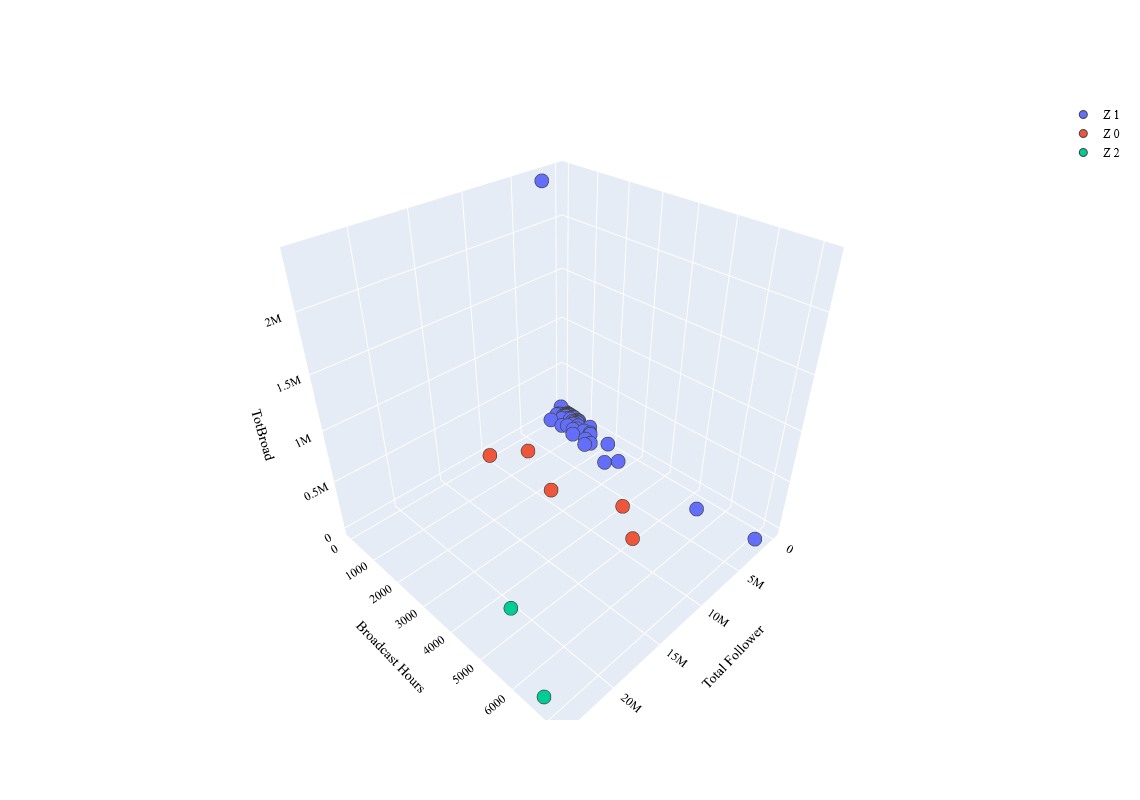

In [66]:
import plotly.graph_objects as go

# df_clust = df_clust[['Total Follower','Broadcast Hours','TotBroad']]
df_3d = df_clust.copy()
df_predict = cls.predict(df_clust)

df_3d['Z'] = pd.Series(df_predict, index=df_3d.index)

PLOT = go.Figure()

for C in list(df_3d.Z.unique()):
    
    PLOT.add_trace(go.Scatter3d(x = df_3d[df_3d.Z == C]['Total Follower'],
                                y = df_3d[df_3d.Z == C]['Broadcast Hours'],
                                z = df_3d[df_3d.Z == C]['TotBroad'],
                                mode = 'markers', marker_size = 8, marker_line_width = 1,
                                name = 'Z ' + str(C)))


PLOT.update_layout(width = 800, height = 800, autosize = True, showlegend = True,
                   scene = dict(xaxis=dict(title = 'Total Follower', titlefont_color = 'black'),
                                yaxis=dict(title = 'Broadcast Hours', titlefont_color = 'black'),
                                zaxis=dict(title = 'TotBroad', titlefont_color = 'black')),
                   font = dict(family = "Gilroy", color  = 'black', size = 12))